# Ejercicio 7 Segunda Parte

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

In [52]:
url="https://raw.githubusercontent.com/davidzarruk/AdvancedMethodsDataAnalysisClass/main/datasets/mashable.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [53]:
df.shape

(6000, 61)

In [70]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [55]:
y.mean()

0.5

In [71]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [72]:
y_train=y_train.astype("category")
y_test=y_test.astype("category")

# Exercise 7.6

# Calibración de árbol mediante cross validation

In [58]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

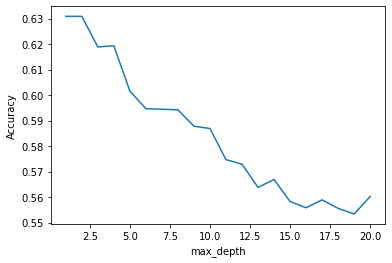

In [59]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [60]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [61]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean())

Text(0, 0.5, 'F1')

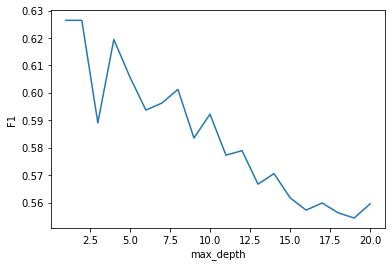

In [62]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('F1')

In [63]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6264200632335681, 2)

La cantidad de niveles que maximiza las métricas de desempeño son 3

# Desempeño del árbol en datos de validación

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
pred_arbol=clf.predict(X_test)
accuracy=accuracy_score(y_test,pred_arbol)
f1=f1_score(y_test,pred_arbol)
print("Accuracy",accuracy.round(2),"F1", f1.round(2))

Accuracy 0.65 F1 0.64


# Logistic Regression

# Desempeño en datos de validación

In [244]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X_train,y_train)
accuracy_lr=accuracy_score(y_test,model.predict(X_test))
f1_lr=f1_score(y_test, model.predict(X_test))
print("Accuracy",accuracy_lr.round(2),"F1",f1_lr.round(2))

Accuracy 0.61 F1 0.61


C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se concluye que el árbol de decisión tiene mayor poder de predicción que el modelo de regresión logística.

# Exercise 7.7
## 100 árboles max_depth=None

In [106]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
n_B = 100

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_B)

trees = {}
for i in range(n_B):
    trees[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [184]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_B)))
for i in range(n_B):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2185,1,1,1,1,0,1,1,1,1,0,...,1,0,1,1,0,1,1,1,1,1
2520,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,0,1,0,1,1
3721,1,1,1,0,1,0,1,1,1,1,...,1,1,0,1,0,1,0,1,1,1
3727,0,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## 100 árboles max depth=2

In [163]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_B)

trees_2 = {}
for i in range(n_B):
    trees_2[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees_2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [164]:
# Predict 
y_pred_df_2 = pd.DataFrame(index=X_test.index, columns=list(range(n_B)))
for i in range(n_B):
    y_pred_df_2.iloc[:, i] = trees_2[i].predict(X_test)

y_pred_df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 100 Regresiones Logísticas

In [214]:
log_reg = LogisticRegression()
y_pred_3 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
# DataFrame for storing predicted price from each tree

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_tr = X_train.iloc[sample]
    y_tr = y_train.iloc[sample]
    log_reg.fit(X_tr, y_tr)
    y_pred_3[i,] = log_reg.predict(X_test)

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Exercise 7.8 
## Ensamblar mediante votación
### 100 árboles max_depth=None

In [166]:
votacion_1=y_pred_df.mean(axis=1)
votacion_1 = (votacion_1 > 0.5).astype(int)
accuracy=accuracy_score(y_test,votacion_1)
f1=f1_score(y_test,votacion_1)
print("Accuracy",accuracy.round(2),"F1", f1.round(2))

Accuracy 0.64 F1 0.64


### 100 árboles max_depth =2

In [167]:
votacion_2=y_pred_df_2.mean(axis=1)
votacion_2 = (votacion_2 > 0.5).astype(int)
accuracy=accuracy_score(y_test,votacion_2)
f1=f1_score(y_test,votacion_2)
print("Accuracy",accuracy.round(2),"F1", f1.round(2))

Accuracy 0.65 F1 0.64


### 100 Regresiones Logísticas

In [168]:
votacion_3=y_pred_3.mean(axis=1)
votacion_3 = (votacion_3 > 0.5).astype(int)
accuracy=accuracy_score(y_test,votacion_3)
f1=f1_score(y_test,votacion_3)
print("Accuracy",accuracy.round(2),"F1", f1.round(2))

Accuracy 0.62 F1 0.61


## Exerceise 7.9
### Ensamble. Porcentaje de los modelos que predicen positivo

In [157]:
promedio=(votacion_1+votacion_2+votacion_3)/3
promedio

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       0.000000
          ...   
1495    0.333333
1496    0.000000
1497    1.000000
1498    0.000000
1499    0.000000
Length: 1500, dtype: float64

### Threshold 0.33

In [150]:
promedio_33=(promedio>0.33).astype(int)
f1=f1_score(y_test,promedio_33)
print("F1", f1.round(2))

F1 0.67


### Threshold 0.66

In [169]:
promedio_66=(promedio>0.66).astype(int)
f1=f1_score(y_test,promedio_66)
print("F1", f1.round(2))

F1 0.61


El umbral que maximiza F1 es 0.666. De manera que si al menos 1 modelo predice positivo, se debe tomar esa predicción.

## Exercise 7.10

In [158]:
#Select each oob sample
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

### Desempeño de cada árbol

In [175]:
from sklearn import metrics
errors = np.zeros(n_B)

for i in range(n_B):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] =1-metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

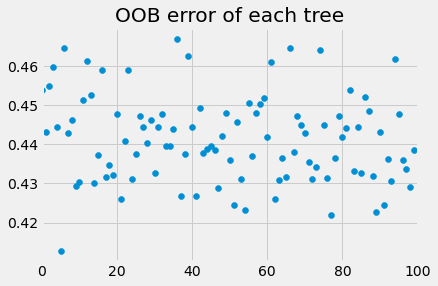

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

### Cálculo de alpha según desempeño de cada árbol

In [182]:
alpha = (1 - errors) / (1 - errors).sum()
alpha

array([0.00977571, 0.00996813, 0.00975799, 0.00966896, 0.00994365,
       0.01050995, 0.00958043, 0.00996869, 0.0099106 , 0.01021233,
       0.01019609, 0.00981913, 0.0096402 , 0.00979802, 0.01019991,
       0.01007207, 0.00968179, 0.0101721 , 0.01011751, 0.01016184,
       0.00988494, 0.0102751 , 0.01000561, 0.00968229, 0.01018054,
       0.01006727, 0.00989187, 0.00994133, 0.01001455, 0.00991339,
       0.01015223, 0.00994125, 0.00988173, 0.01002928, 0.0100289 ,
       0.00995464, 0.00953876, 0.0102604 , 0.01006728, 0.0096194 ,
       0.00994365, 0.01026114, 0.00985718, 0.01006249, 0.01004388,
       0.01003001, 0.01005023, 0.01022307, 0.00998395, 0.00987768,
       0.01009475, 0.0102993 , 0.00992215, 0.01018143, 0.01032483,
       0.00983269, 0.01007735, 0.00987845, 0.00983655, 0.00981011,
       0.00998814, 0.00964516, 0.01027176, 0.01018591, 0.010084  ,
       0.01017358, 0.00958106, 0.01005906, 0.00989188, 0.0099329 ,
       0.00997099, 0.01010562, 0.01018143, 0.0101261 , 0.00958

In [186]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

### Desempeño de árbol usando voto ponderado por oob_error

In [181]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test).round(2), metrics.accuracy_score(y_pred, y_test).round(2)

(0.64, 0.64)

# Exercise 7.11
### La probabilidad de la votación ponderada por OOB está dada por:

In [190]:
weighted_sum_1.head(5)

1483    0.830492
2185    0.621217
2520    0.571372
3721    0.750060
3727    0.198807
dtype: float64

### Se halla el threshold que maximice F1

In [202]:
threshold=range(0,100,5)
F1=[]

for n in threshold:
          prediction=(weighted_sum_1 >= n/100).astype(np.int)
          F1.append(metrics.f1_score(prediction, y_test).round(2))

Text(0.5, 1.0, 'Métrica F1 para cada umbral ')

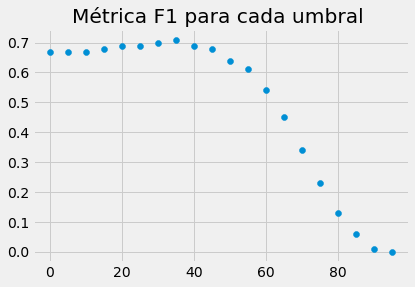

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(threshold, F1)
plt.title('Métrica F1 para cada umbral ')

Se concluye que el umbral que maximiza F1 es 35%. Es decir si la votación ponderada es superior a 35% se debe predecir como positivo.

# Exercise 7.12
### Se corre una regresión logística con las predicciones de los 3 modelos constuidos inicialmente como las variables regresoras

In [239]:
df_logit=pd.DataFrame(columns=["Tree1", "Tree2", "lr", "y"])
df_logit["Tree1"]=y_pred_df.mean(axis=1)
df_logit["Tree2"]=y_pred_df_2.mean(axis=1)
df_logit["lr"]=y_pred_3.mean(axis=1)
df_logit["y"]=y_test
df_logit.tail()

,Tree1,Tree2,lr,y
3077,0.52,0.76,0.03,0
5166,0.30,0.03,0.13,1
2227,0.55,0.99,0.73,1
5684,0.45,0.00,0.00,1
1937,0.33,0.01,0.00,0


In [240]:
X=df_logit[["Tree1", "Tree2", "lr"]]
Y=df_logit["y"]
logit = LogisticRegression().fit(X, Y)

In [241]:
ygorro=logit.predict_proba(X)[:,1]

In [242]:
threshold=range(0,100,5)
F1_=[]

for n in threshold:
          prediction_=(ygorro>= n/100).astype(np.int)
          F1_.append(metrics.f1_score(prediction_, y_test).round(2))

Text(0.5, 1.0, 'Métrica F1 para cada umbral ')

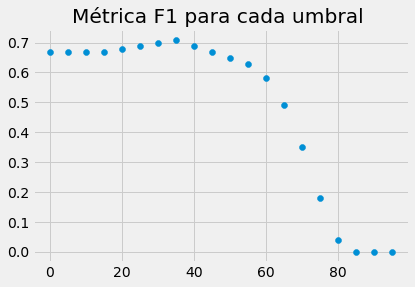

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(threshold, F1_)
plt.title('Métrica F1 para cada umbral ')

Se concluye que el umbral que maximiza F1 es 35%. Es decir si la votación ponderada es superior a 35% se debe predecir como positivo.